STUDENT PERFORMANCE DATA EDA 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings as warning
import seaborn as sns
%matplotlib inline


In [ ]:
df = pd.read_csv("./data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape 

(1000, 8)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [12]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"Value counts for column '{column}':")
    print(df[column].unique() , len(df[column].unique()))
    print("\n")

Value counts for column 'gender':
['female' 'male'] 2


Value counts for column 'race/ethnicity':
['group B' 'group C' 'group A' 'group D' 'group E'] 5


Value counts for column 'parental level of education':
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 6


Value counts for column 'lunch':
['standard' 'free/reduced'] 2


Value counts for column 'test preparation course':
['none' 'completed'] 2




In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df["total_score"] = df["math score"] + df["reading score"] + df["writing score"]
df["average_score"] = df["total_score"] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
numerical_features = [features for features in df.columns if df[features].dtype != 'O']
categorical_features = [features for features in df.columns if df[features].dtype == 'O']
print(f'Numerical features: {numerical_features}')
print(f'Categorical features: {categorical_features}')

Numerical features: ['math score', 'reading score', 'writing score', 'total_score', 'average_score']
Categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [18]:
reading_full_marks = df[df['reading score'] == 100]["average_score"].count()
writing_full_marks = df[df['writing score'] == 100]["average_score"].count()
math_full_marks = df[df['math score'] == 100]["average_score"].count()
print(f'Number of students with full marks in Reading: {reading_full_marks}')
print(f'Number of students with full marks in Writing: {writing_full_marks}')
print(f'Number of students with full marks in Math: {math_full_marks}')

Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14
Number of students with full marks in Math: 7


In [20]:
reading_score_less_20 = df[df['reading score'] < 20]["average_score"].count()
writing_score_less_20 = df[df['writing score'] < 20]["average_score"].count()
math_score_less_20 = df[df['math score'] < 20]["average_score"].count()
print(f'Number of students with less than 20 marks in Reading: {reading_score_less_20}')
print(f'Number of students with less than 20 marks in Writing:  {writing_score_less_20}')
print(f'Number of students with less than 20 marks in Math: {math_score_less_20}')

Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Writing:  3
Number of students with less than 20 marks in Math: 4


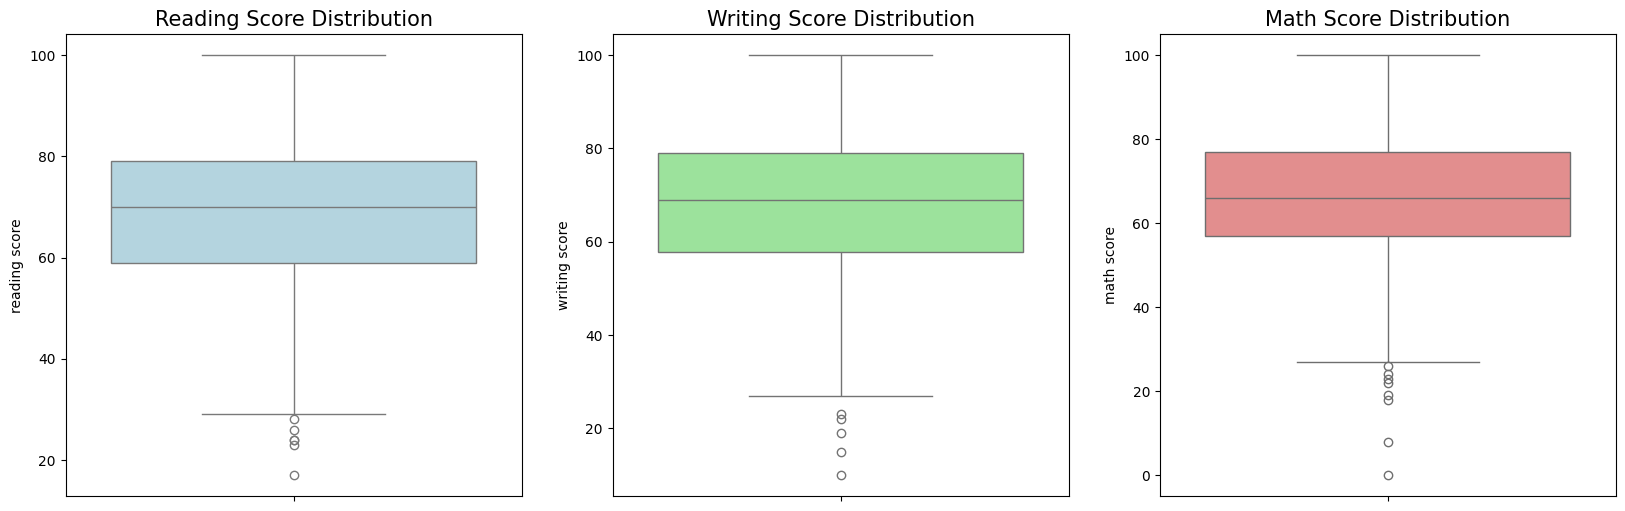

In [21]:
flg , ans = plt.subplots(1,3, figsize = (20,6))
sns.boxplot(df['reading score'], ax = ans[0], color = 'lightblue')
ans[0].set_title('Reading Score Distribution', fontsize = 15)
sns.boxplot(df['writing score'], ax = ans[1], color = 'lightgreen')
ans[1].set_title('Writing Score Distribution', fontsize = 15)
sns.boxplot(df['math score'], ax = ans[2], color = 'lightcoral')
ans[2].set_title('Math Score Distribution', fontsize = 15)
plt.show()

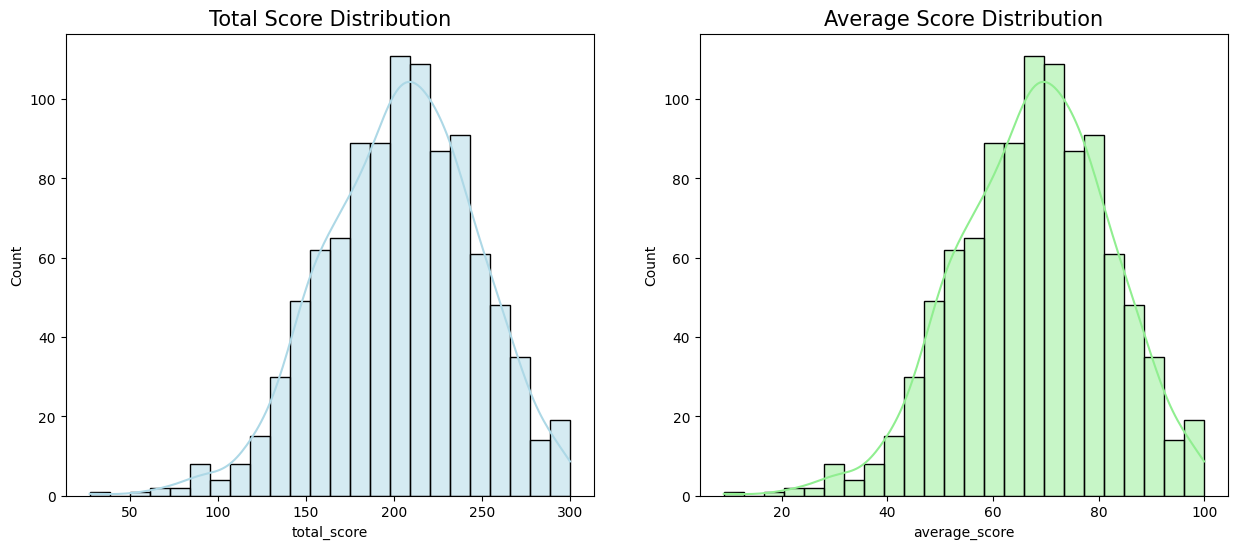

In [ ]:
# histogram for average and toaal scores  with hue 

flg , ans = plt.subplots(1,2, figsize = (15,6))
sns.histplot(df['total_score'], ax = ans[0], color = 'lightblue', kde = True)
ans[0].set_title('Total Score Distribution', fontsize = 15)
sns.histplot(df['average_score'], ax = ans[1], color = 'lightgreen', kde = True)
ans[1].set_title('Average Score Distribution', fontsize = 15)
plt.show()

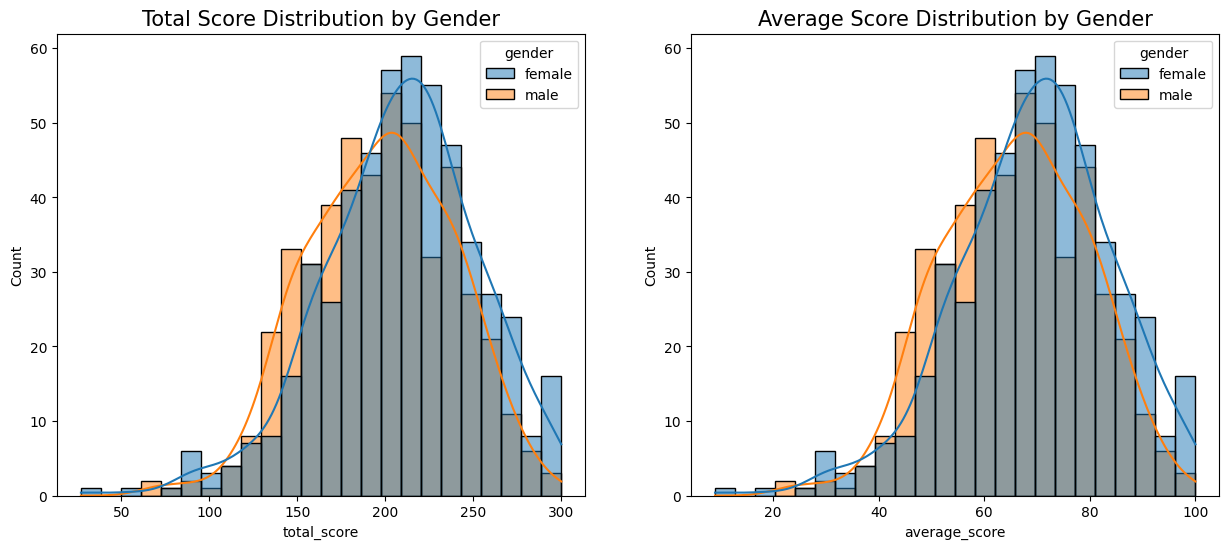

In [ ]:
# histogram for average and toaal scores  with  gender hue 
flg , ans = plt.subplots(1,2, figsize = (15,6))
sns.histplot(df, x = 'total_score', ax = ans[0], hue = 'gender', kde = True)
ans[0].set_title('Total Score Distribution by Gender', fontsize = 15)
sns.histplot(df, x = 'average_score', ax = ans[1], hue = 'gender', kde = True)
ans[1].set_title('Average Score Distribution by Gender', fontsize = 15)
plt.show()

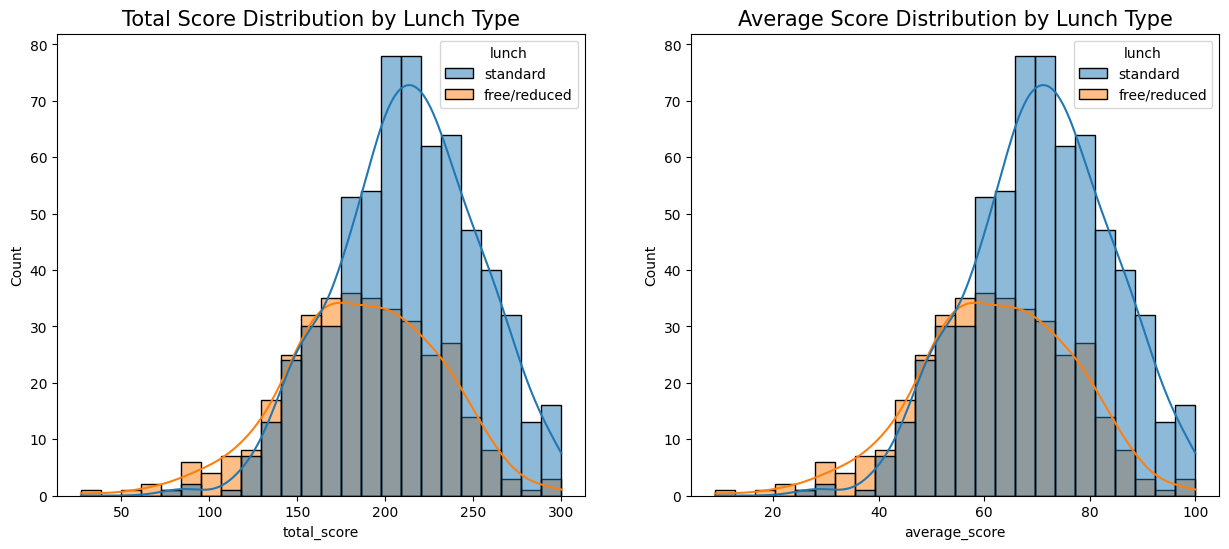

In [24]:
# histogram for average and toaal scores  with  lunch  hue 
flg , ans = plt.subplots(1,2, figsize = (15,6))
sns.histplot(df, x = 'total_score', ax = ans[0], hue = 'lunch', kde = True)
ans[0].set_title('Total Score Distribution by Lunch Type', fontsize = 15)
sns.histplot(df, x = 'average_score', ax = ans[1], hue = 'lunch', kde = True)
ans[1].set_title('Average Score Distribution by Lunch Type', fontsize = 15)
plt.show()